# Ant_proxy_DF2003 (effect of off albedo aging)

In [1]:
import warnings
warnings.simplefilter("ignore")
import statsmodels.api as sm
from scipy import stats
import numpy as np
import pandas as pd
#
import matplotlib
import matplotlib.pyplot as plt
#
import cartopy.crs as ccrs

In [2]:
# 描画設定
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.family': 'sans-serif', 'text.usetex': False,'pcolor.shading':'auto'})

In [3]:
def Mon():
    import pandas as pd
    mons = pd.DataFrame({
            "name": ["Jan", "Feb", "Mar","Apr","May","Jun",\
                     "Jul","Aug","Sep","Oct","Nov","Dec","Jan"], 
            "days": [31,28,31,30,31,30,31,31,30,31,30,31,31], 
            "dayacc":[0,31,59,90,120,151,181,212,243,273,304,334,365], 
            "days_lp": [31,29,31,30,31,30,31,31,30,31,30,31,31], 
            "dayacc_lp":[0,31,60,91,121,152,182,213,244,274,305,335,366]             
            })
    return mons

In [4]:
mons=Mon()
xticks=np.zeros(12)
xticks[:]=mons["dayacc"][1:]-31
xlabels=mons["name"][1:]

In [5]:
class Site:
    def DomeF(self):
        sx=14 ; sy=60 # 77°18′59″S 39°42′04″E
        df_lat=-77.3
        df_lon=39.66
        return df_lon,df_lat,sx,sy

In [6]:
df_lon,df_lat,df_x,df_y = Site().DomeF()    

In [7]:
loadfile  = "prcp_d18O.npz"
dataset   = np.load(loadfile)
prcp_d18O = dataset["prcp_d18O"]  [df_x-1, df_y-1,:]
lon2     = dataset["lon2"]
lat2     = dataset["lat2"]
y        = dataset["y"]
m        = dataset["m"]
d        = dataset["d"]

In [8]:
loadfile = "prcp.npz"
dataset  = np.load(loadfile)
prcp     = dataset["prcp"] [df_x-1, df_y-1,:]

In [9]:
loadfile = "T2.npz"
dataset  = np.load(loadfile)
T2     = dataset["T2"] [df_x-1, df_y-1,:]

In [10]:
loadfile  = "prcp_d18O_offaging.npz"
dataset   = np.load(loadfile)
noaging_prcp_d18O = dataset["prcp_d18O"] [df_x-1, df_y-1,:]
loadfile  = "prcp_offaging.npz"
dataset   = np.load(loadfile)
noaging_prcp = dataset["prcp"] [df_x-1, df_y-1,:]
loadfile  = "T2_offaging.npz"
dataset   = np.load(loadfile)
noaging_T2 = dataset["T2"] [df_x-1, df_y-1,:]

In [11]:
model_dayst = len(y[y<2003])+len(m[(y==2003)&(m==1)])
model_dayed = model_dayst + 365 #- len(nanlist)

model_y              = y          [               model_dayst:model_dayed]
model_m              = m          [               model_dayst:model_dayed]
model_d              = d          [               model_dayst:model_dayed]
model_temp_df        = T2       [model_dayst:model_dayed]
model_prcp_df        = prcp       [model_dayst:model_dayed]
model_prcp_d18O_df   = prcp_d18O  [model_dayst:model_dayed]
noaging_temp_df        = noaging_T2       [model_dayst:model_dayed]
noaging_prcp_df        = noaging_prcp       [model_dayst:model_dayed]
noaging_prcp_d18O_df   = noaging_prcp_d18O  [model_dayst:model_dayed]

In [ ]:
def vert_lines(ax, xint):
    if len(xint) < 2 :
        ax.axvline(x=xint,ls='-',linewidth=1, color='k')
    else:
        for i in range(len(xint)):
            ax.axvline(x=xint[i],ls='--',linewidth=1, color='k')
        
    return ax

In [ ]:
def hor_lines(ax, yint):
    if len(yint) < 2 :
        ax.axhline(y=yint,ls='-',linewidth=1, color='k')
    else:
        for i in range(len(yint)):
            ax.axhline(y=yint[i],ls='--',linewidth=1, color='k')  
            
    return ax

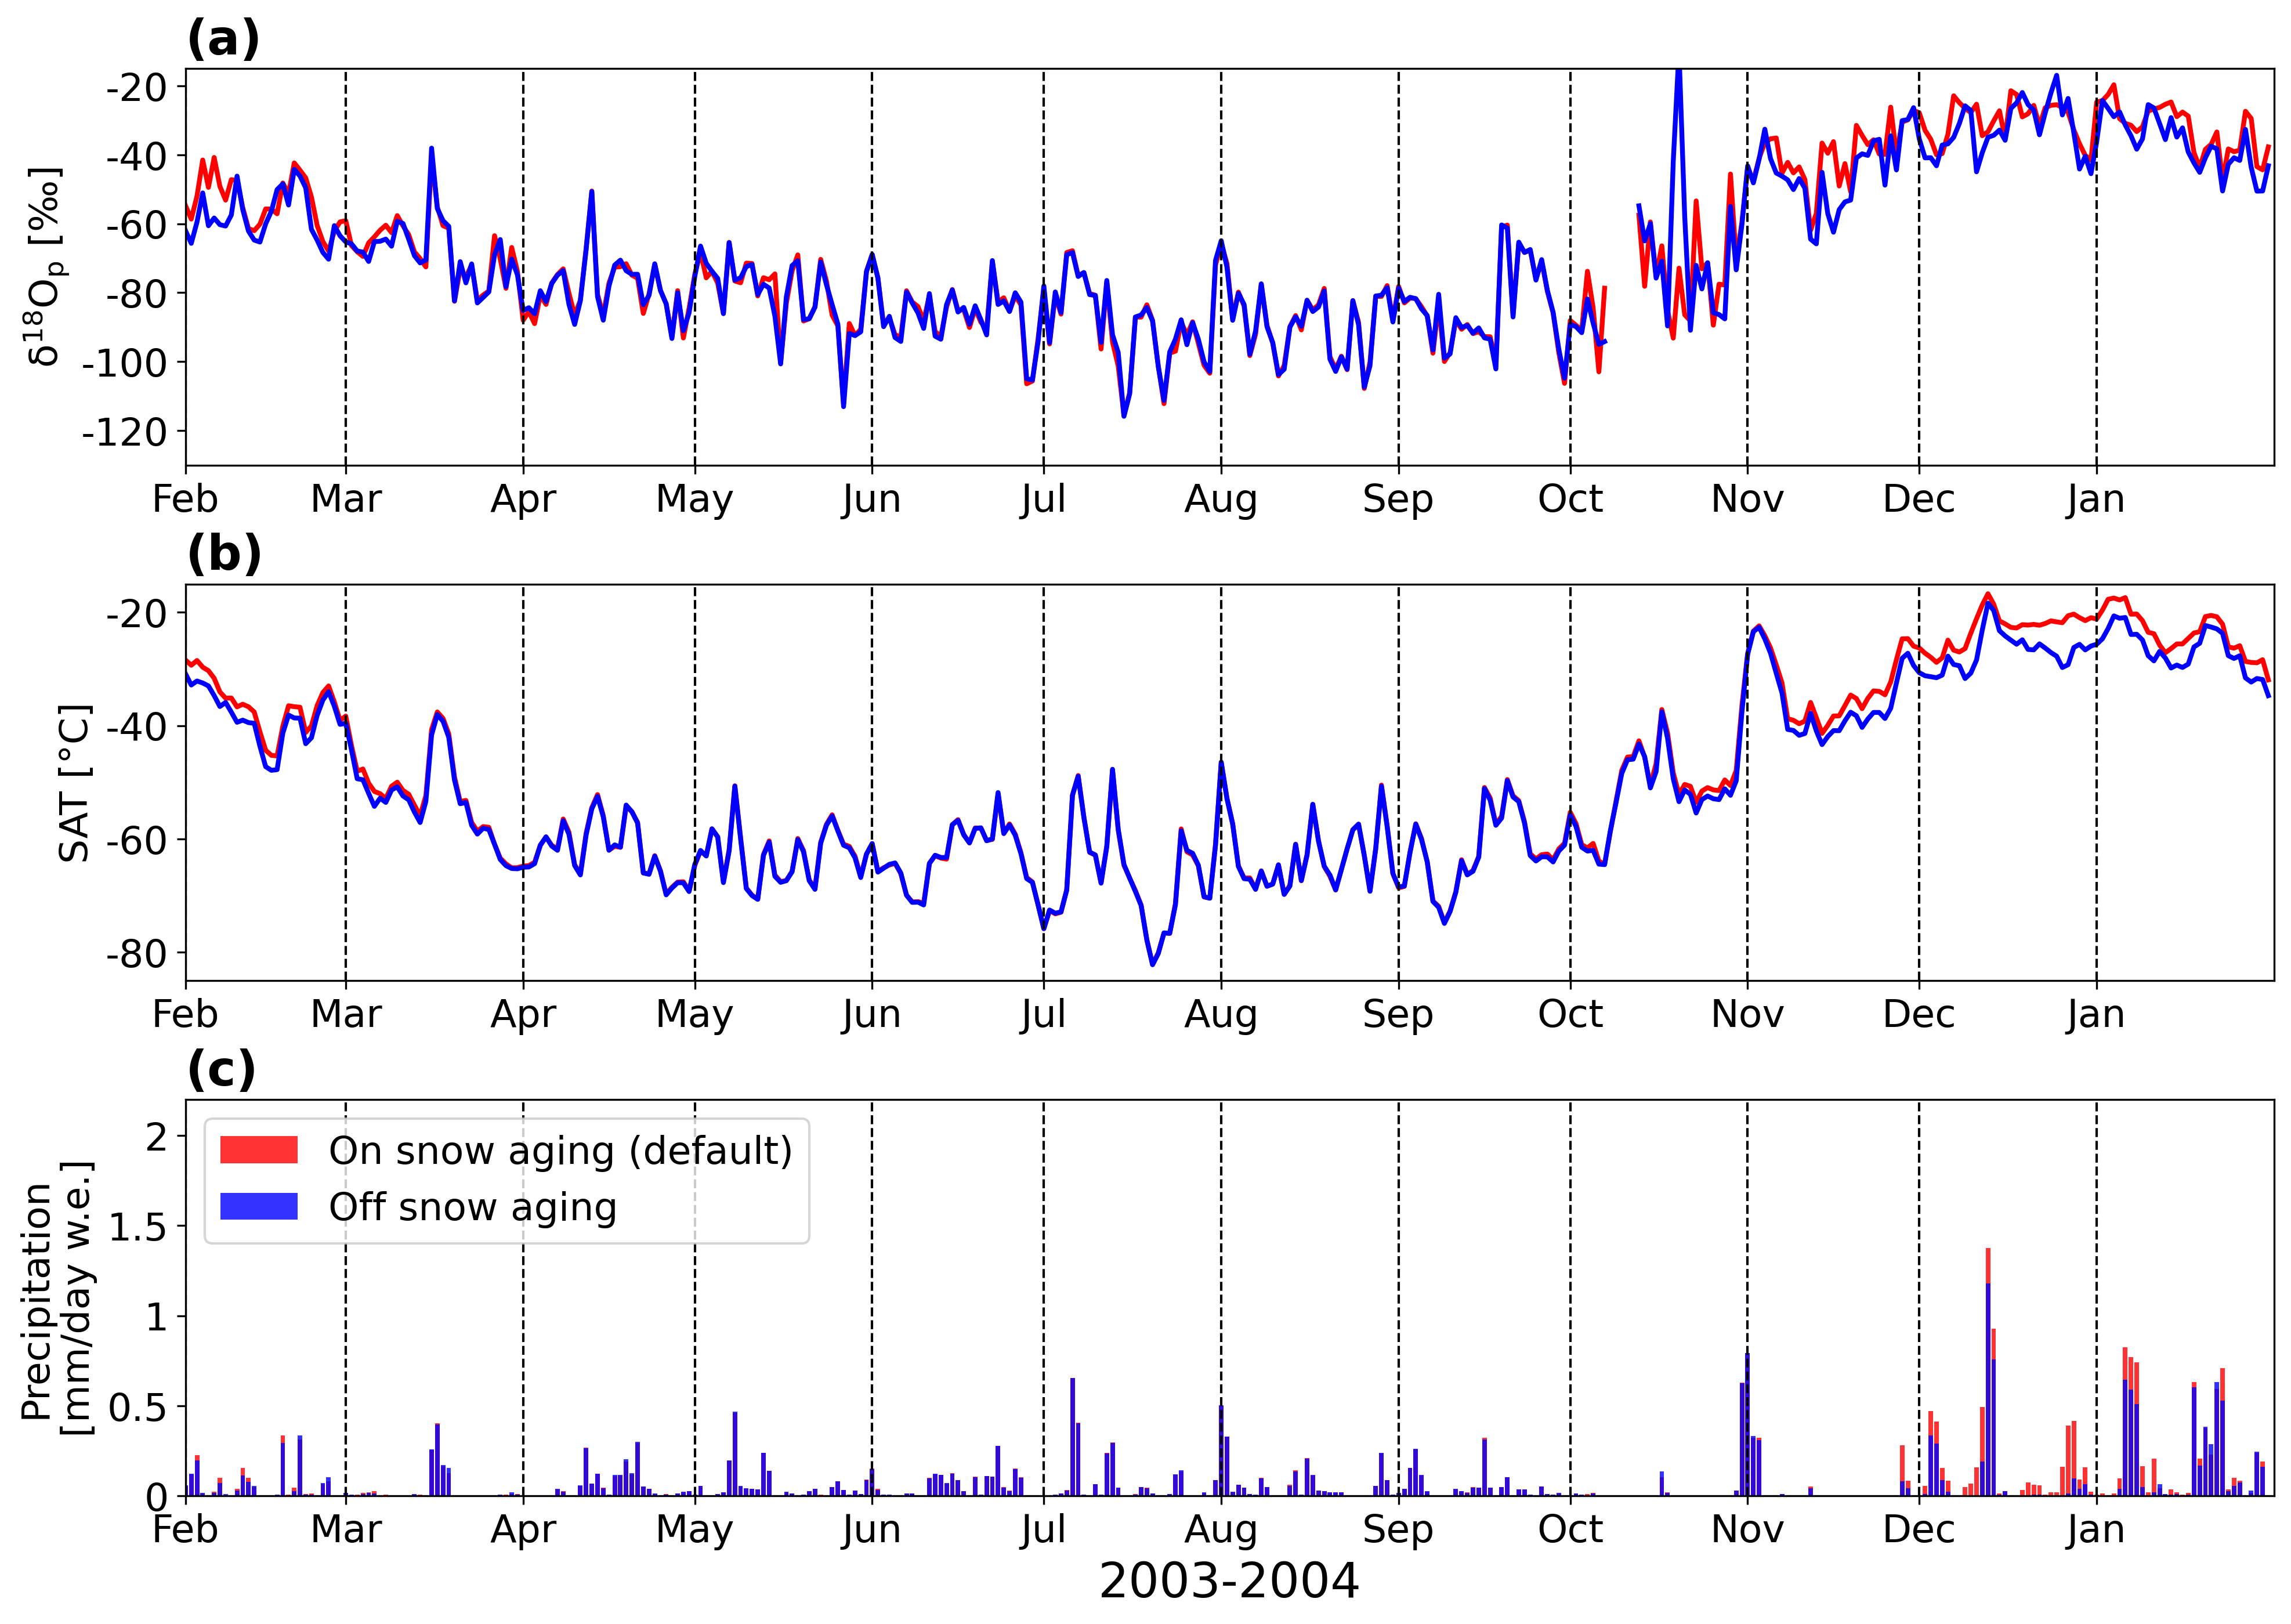

In [34]:
fig = plt.figure(figsize=(15,10)) 
days=365
daylist=range(days)
col_anom = "black"
col_model = "red"

#-- d18Op --
ax =  fig.add_subplot(3,1,1)
plt.title("(a)",loc="left",fontsize=20, weight="demibold") 
## Model
ax.plot(daylist, model_prcp_d18O_df, ms=10, color=col_model, linewidth=2,label="On snow aging (default)")
ax.plot(daylist, noaging_prcp_d18O_df, ms=10, color="blue",linestyle="solid", linewidth=2, label="Off snow aging")
ax.tick_params(labelsize=24)
ax.set_ylabel("$\mathsf{\delta^{18}O_p}$ [\u2030]", fontsize=16, color="black") 
ax.set_ylim(-130,-15)
ax.set_yticks([-120,-100,-80,-60,-40,-20])
ax.set_yticklabels([-120,-100,-80,-60,-40,-20],fontsize=16)
ax.set_xlim(0, days)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=16)
vert_lines(ax,xticks)  

#-- Temprature --
ax = fig.add_subplot(3,1,2)
plt.title("(b)",loc="left",fontsize=20, weight="demibold") 
## Model
ax.plot(daylist, model_temp_df, ms=10, color=col_model, linewidth=2, label="On snow aging (default)")
ax.plot(daylist, noaging_temp_df, ms=10, color="blue", linewidth=2, label="Off snow aging")
ax.tick_params(labelsize=24)
ax.set_ylabel("SAT [\u00b0C]", fontsize=16, color="black" )
ax.set_xlim(0,days) 
ax.set_ylim(-85,-15)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=16)
ax.set_yticks([-80,-60,-40,-20])
ax.set_yticklabels([-80,-60,-40,-20],fontsize=16)

vert_lines(ax,xticks)  

   
#-- Precipitation --
ax = fig.add_subplot(3,1,3)
plt.title("(c)",loc="left",fontsize=20, weight="demibold") 
## Model
ax.bar(daylist, model_prcp_df, color=col_model, linewidth=2, alpha=0.8, label="On snow aging (default)")
ax.bar(daylist, noaging_prcp_df, color="blue", linewidth=2, alpha=0.8, label="Off snow aging")
ax.tick_params(labelsize=24)
ax.set_ylabel("Precipitation\n[mm/day w.e.]", fontsize=16, color="black") 
ax.set_xlim(0,days)
ax.set_ylim(0,2.2)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=16)
ax.set_yticks([0,0.5,1,1.5,2])
ax.set_yticklabels([0,0.5,1,1.5,2],fontsize=16)

vert_lines(ax,xticks) 
ax.set_xlabel("2003-2004", loc="center",fontsize=20)
ax.legend( loc='upper left',fontsize=16)

plt.subplots_adjust(top=0.92,bottom=0.1,left=0.1,right=0.9,hspace=0.3,wspace=0.05)
plt.show()
fig.savefig("Ant_proxy_DF2003_noaging.png")
#fig.savefig("pic/FigureD1.jpg")

In [12]:
np.nansum(model_prcp_df[(model_m==12)+(model_m<3)]),np.nansum(noaging_prcp_df[(model_m==12)+(model_m<3)])

(14.00760728176641, 9.943988256320056)

Kanon Kino (kanon[at]aori.u-tokyo.ac.jp)